In [40]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
hdul = fits.open('trappist-1_dem_spectra.fits')

In [5]:
hdul.info()

Filename: trappist-1_dem_spectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   400R x 4C   [D, D, D, D]   


In [6]:
data = hdul[1].data

In [7]:
data.names

['Wavelength', 'Bin-Integrated Flux', 'Lower_Error_16', 'Upper_Error_84']

In [8]:
#data['WAVELENGTH']

In [10]:
w, f = data['WAVELENGTH'], data['Bin-Integrated Flux']/5

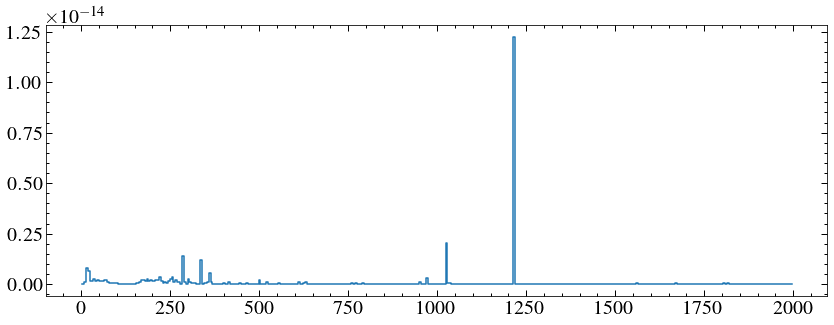

In [12]:
plt.step(w,f, where='mid')

In [16]:
ldat = Table.read('../combined/TRAPPIST-1_1Aeuv_estimate.ecsv')

In [17]:
lw, lf = ldat['WAVELENGTH'], ldat['FLUX']

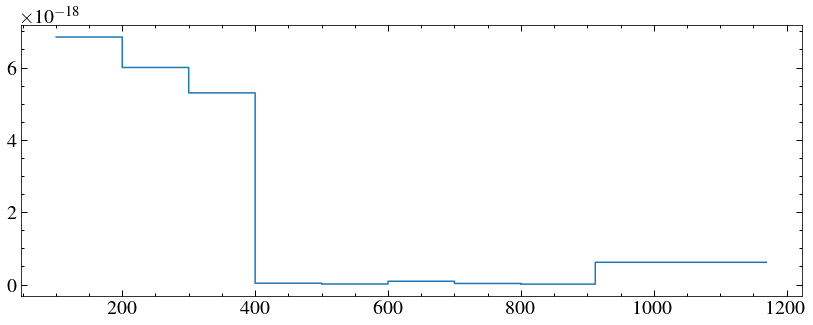

In [18]:
plt.step(lw, lf, where='mid')

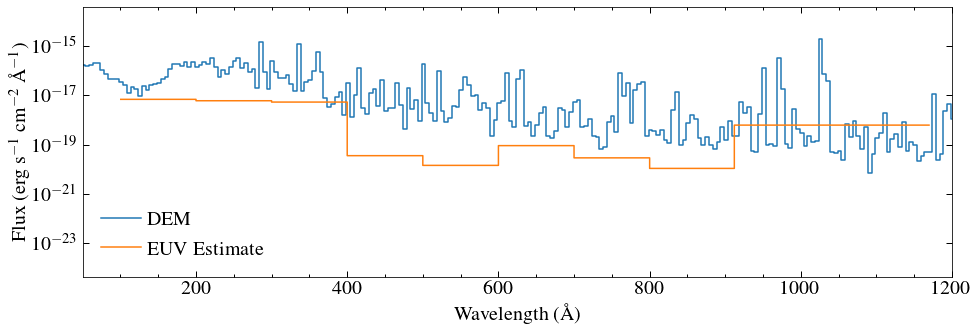

In [26]:
plt.step(w,f, where='mid', label='DEM')
plt.step(lw, lf, where='mid', label='EUV Estimate')
plt.xlim(50, 1200)
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
plt.savefig('dem_v_euv.png', dpi =150)

Comparison with Phoenix models

In [37]:
mpath = '/home/david/work/muscles/trappist-1/sp_models/'
d = 12.14*u.pc
r = 0.117*const.R_sun
scale = (r/d.to(u.m))**2
mods = os.listdir(mpath)
mods

['TRAPPIST1_2A_fullres.txt',
 'TRAPPIST1_1A_fullres.txt',
 'TRAPPIST1_2B_fullres.txt']

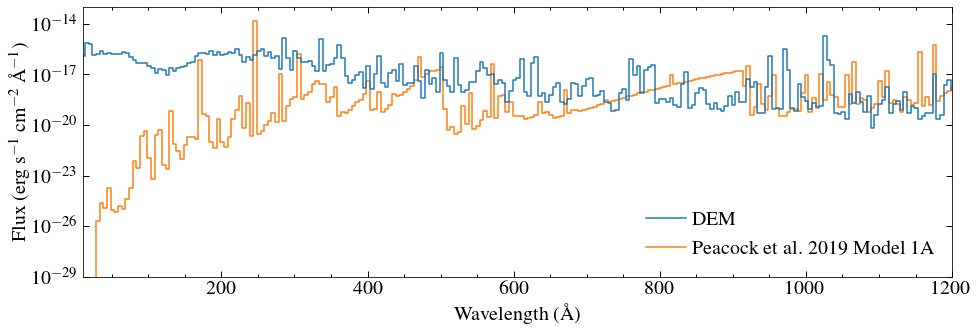

In [46]:
#for mod in mods:
   # mw, mf = np.loadtxt(mpath+mod, unpack=True, skiprows=1)
   # plt.plot(mw, mf*scale)
plt.step(w,f, where='mid', label='DEM')
mw, mf = np.loadtxt(mpath+mods[1], unpack=True, skiprows=1)
#mfi = interp1d(mw, mf, fill_value='extrapolate')(w)
plt.step(w, mfi*scale, zorder=-1, where='mid', label = 'Peacock et al. 2019 Model 1A')
#plt.step(lw, lf, where='mid', label='EUV Estimate')
plt.xlim(10, 1200)
plt.ylim(1e-29, 1e-13)
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
#plt.savefig('dem_v_P19.png', dpi=150)